# Data Pipeline 

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [81]:
#Attribute Information:

#Class Values:

#unacc, acc, good, vgood

#Attributes:

#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#lug_boot: small, med, big.
#safety: low, med, high.

# Goal
Build an end-to-end machine learning "pipeline", that performs everything you need to achieve the prediction goal, from the raw data, to predicted results

### OPTIONAL 
Pipline: Luigi, Airflow

Take raw data to forcasted numbers

In [50]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
df = pd.read_csv('car_data.csv', header = None)

In [52]:
# Rename Columns

columns1 = ['Buying','Maintainence','Doors','Persons','Lug Boot','Safety','Class']
df.columns = columns1
df.head(5)

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
df.dtypes

Buying          object
Maintainence    object
Doors           object
Persons         object
Lug Boot        object
Safety          object
Class           object
dtype: object

In [34]:
# check for null
df.isnull().sum()

Buying          0
Maintainence    0
Doors           0
Persons         0
Lug Boot        0
Safety          0
Class           0
dtype: int64

In [35]:
y = df['Class']

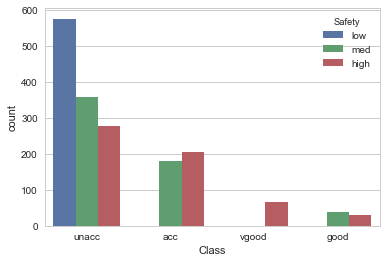

In [75]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x="Class", hue="Safety",data=df)

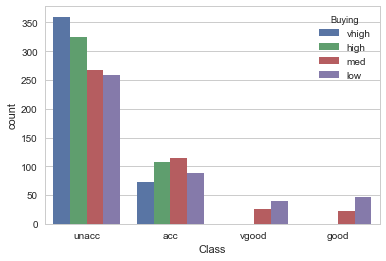

In [88]:
sns.set(style="whitegrid")
sns.countplot(x="Class", hue="Buying", data=df)

## Preprocessing Data

In [89]:
df1 = df.copy()
df1.head()

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [90]:
df1.drop(['Class'], axis=1, inplace=True)

In [91]:
df1.head()

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [92]:
# Convert our categorical data

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df1['Buying'] = encode.fit_transform(df1['Buying'])
df1['Maintainence'] = encode.fit_transform(df1['Maintainence'])
df1['Doors'] = encode.fit_transform(df1['Doors'])
df1['Persons'] = encode.fit_transform(df1['Persons'])
df1['Lug Boot'] = encode.fit_transform(df1['Lug Boot'])
df1['Safety'] = encode.fit_transform(df1['Safety'])
#df['Class'] = encode.fit_transform(df['Class'])


In [93]:
df1.head()

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [118]:
df1.describe()

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


## Explore the Data

In [94]:
import seaborn as sns

sns.set(style="whitegrid")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


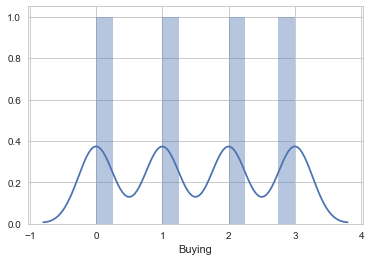

In [97]:
sns.distplot(df1['Buying'])

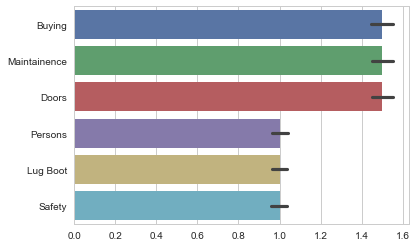

In [99]:
sns.barplot(data=df1, orient="h")

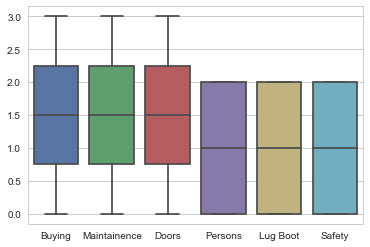

In [100]:
sns.boxplot(data=df1)

## Split into train and test data

In [128]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(df1,y,test_size = 0.3, random_state = 10)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1209, 6)
(519, 6)
(1209,)
(519,)


## Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
y_pred = logit.predict(X_test)

In [133]:
list(zip(y_pred, y_test))

[('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'good'),
 ('unacc', 'unacc'),
 ('unacc', 'acc'),
 ('unacc', 'acc'),
 ('acc', 'unacc'),
 ('unacc', 'acc'),
 ('acc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'acc'),
 ('unacc', 'acc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('acc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('acc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('acc', 'unacc'),
 ('unacc', 'acc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'acc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('acc', 'acc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'vgood'),
 ('unacc', 'unacc'),
 ('unacc', 'acc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 ('unacc', 'unacc'),
 (

In [134]:
print(logit.coef_)
print(logit.intercept_)

[[-0.09240378 -0.11335641  0.0397914   1.01729615 -0.23701168 -0.26604948]
 [-0.18401379 -0.24291412  0.05319108  0.68095076 -0.21948242  0.27338938]
 [ 0.12078664  0.17897248 -0.11659616 -1.25529592  0.42696084  0.44017224]
 [-0.16433221 -0.29697611  0.22605217  0.96787135 -1.26703668 -2.91430904]]
[-1.65897035 -3.50596318  1.17795089 -2.27620813]


### Evaluating results

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

metrics.accuracy_score(y_test, y_pred)

0.7032755298651252

In [136]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.6081660303993114
0.7032755298651252
0.647195743441324


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        acc       0.35      0.23      0.27       102
       good       0.00      0.00      0.00        21
      unacc       0.75      0.92      0.83       371
      vgood       0.00      0.00      0.00        25

avg / total       0.61      0.70      0.65       519



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
cmatrix = confusion_matrix(y_test, y_pred)

In [149]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

,0,1,2,3
0,0,0,102,0
1,0,0,21,0
2,0,0,371,0
3,0,0,25,0


## Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
y_pred = tree.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.9884393063583815

In [142]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.9883898807149736
0.9884393063583815
0.9882843835827932


In [127]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        acc       0.97      0.99      0.98       102
       good       1.00      0.90      0.95        21
      unacc       1.00      1.00      1.00       371
      vgood       1.00      0.96      0.98        25

avg / total       0.99      0.99      0.99       519



## SVM

In [143]:
from sklearn import svm
model = svm.SVC(kernel="linear", C=0.01)
model = model.fit(X_train, y_train)

In [145]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.7148362235067437

In [152]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.5109908264373832
0.7148362235067437
0.5959645818449482


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        acc       0.00      0.00      0.00       102
       good       0.00      0.00      0.00        21
      unacc       0.71      1.00      0.83       371
      vgood       0.00      0.00      0.00        25

avg / total       0.51      0.71      0.60       519



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
